In [ ]:
#Link to the dataset
#https://www.kaggle.com/dileep070/heart-disease-prediction-using-logistic-regression

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report, mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score

In [2]:
### Importing dataframe and visualization

In [3]:
data = pd.read_csv('framingham.csv')

In [4]:
data = data.rename(columns ={"male":"Gender" })

In [5]:
data.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [7]:
data.isnull().sum()

Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
data.describe()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [9]:
#Looking at the correlation matrix, i can see what predictors would more likely affect the predition
corr_matrix = data.corr()
corr_matrix["TenYearCHD"].sort_values(ascending=False)

TenYearCHD         1.000000
age                0.225256
sysBP              0.216429
prevalentHyp       0.177603
diaBP              0.145299
glucose            0.125544
diabetes           0.097317
Gender             0.088428
BPMeds             0.087489
totChol            0.082184
BMI                0.075192
prevalentStroke    0.061810
cigsPerDay         0.057884
heartRate          0.022913
currentSmoker      0.019456
education         -0.054059
Name: TenYearCHD, dtype: float64

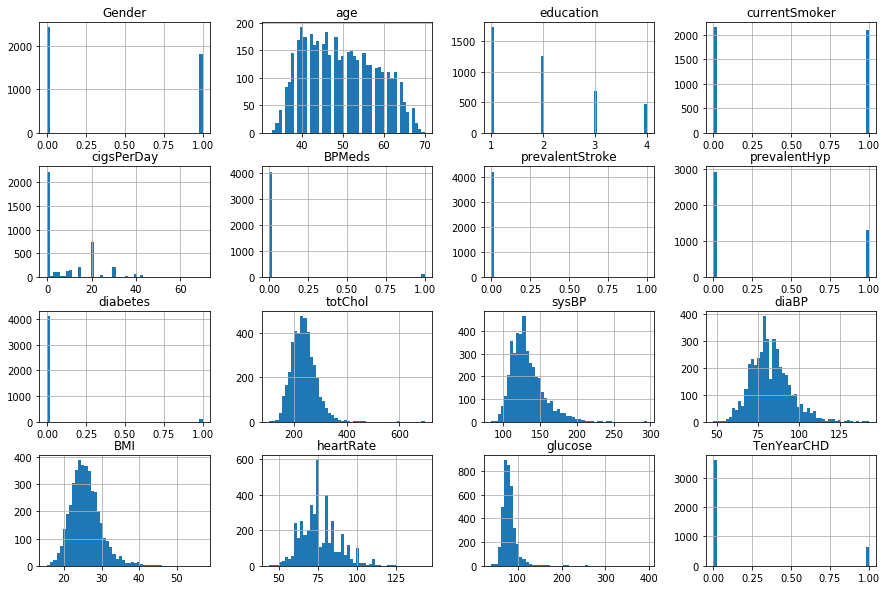

In [10]:
#The histogram plots give a good understanding of how the data is layed out for each of the predictors
data.hist(bins = 50, figsize= (15,10))
plt.show()

In [11]:
#setup a pipeline for StandardScaler and SimpleImputer
set_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy= 'most_frequent'))
])

In [12]:
#Setting X and Y values
#Using the pipeline on the X data
X = data.drop(['TenYearCHD'],axis=1)
y = data["TenYearCHD"]
X_tr = set_pipeline.fit_transform(X)

In [13]:
#split the data into training and test set with 20% of the data being in the test set
X_train, X_test, y_train, y_test = train_test_split(X_tr, y, test_size=0.20, random_state = 42)

In [14]:
#There are 2870 values for patient with no 10 year risk of coronary heart disease CHD, and 520 patients with a 10 year risk of coronary heart disease CHD
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({0: 2870, 1: 520})

In [15]:
#Random Forest Classifier model was used first
# The number of trees used is 100
# the accuracy of the model was 85.7%
rf = RandomForestClassifier(n_estimators=100, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[724   0]
 [121   3]]


Accuracy of Random Forest: 85.73113207547169 

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       724
           1       1.00      0.02      0.05       124

    accuracy                           0.86       848
   macro avg       0.93      0.51      0.49       848
weighted avg       0.88      0.86      0.79       848



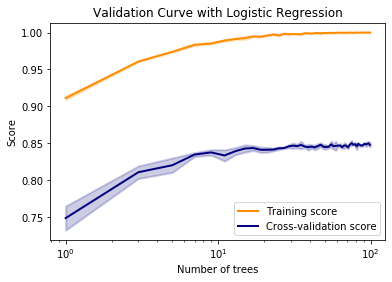

In [16]:
#Validation Curve Plot using random forest regression
#there was a 10% difference betweeen the training score and cross validation score
train_scores_rf, valid_scores_rf = validation_curve(RandomForestClassifier(),X_train, y_train, "n_estimators",np.arange(1,100,2),cv=3, scoring="accuracy",n_jobs=-1)

param_range = np.arange(1,100,2)
train_scores_mean = np.mean(train_scores_rf, axis=1)
train_scores_std = np.std(train_scores_rf, axis=1)
test_scores_mean = np.mean(valid_scores_rf, axis=1)
test_scores_std = np.std(valid_scores_rf, axis=1)

plt.title("Validation Curve with Logistic Regression")
plt.xlabel("Number of trees")
plt.ylabel("Score")
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [17]:
#The second model used is logistic regression
#The model had very close accuracy to random forest, with an accuracy of 85.7%
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[718   6]
 [115   9]]


Accuracy of Logistic Regression: 85.73113207547169 

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.60      0.07      0.13       124

    accuracy                           0.86       848
   macro avg       0.73      0.53      0.53       848
weighted avg       0.82      0.86      0.81       848



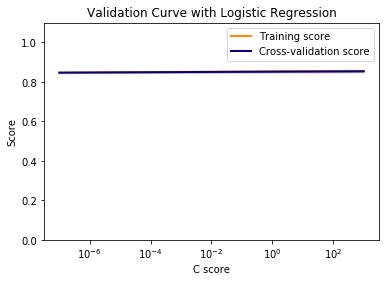

In [18]:
#Validation Curve Plot using logistic regression
#The training and cross validation scores were equal and moving at a straight line, which could mean the model is not being affected by the parameters
train_scores, valid_scores = validation_curve(LogisticRegression(),X_train, y_train, "C",np.logspace(-7, 3, 3),cv=5)
param_range = np.logspace(-7, 3, 3)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
test_scores_std = np.std(valid_scores, axis=1)

plt.title("Validation Curve with Logistic Regression")
plt.xlabel("C score")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [19]:
#The final model i used was GaussianNB, this model performed the poorest at an accuracy of 82.4
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[675  49]
 [100  24]]


Accuracy of Naive Bayes model: 82.42924528301887 

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       724
           1       0.33      0.19      0.24       124

    accuracy                           0.82       848
   macro avg       0.60      0.56      0.57       848
weighted avg       0.79      0.82      0.80       848



In [20]:
#Conducted a grid search on the data to see if it has a potential of improving the accuracy
param_grid = {'penalty':['l1','l2'], 
              'C':np.logspace(-3,3,7)}

grid_search = GridSearchCV(estimator = lr,  
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 10
                           ,verbose=0)

grid_search.fit(X_train, y_train)
print("Best hyperparameters:   ",grid_search.best_params_)
print("Accuracy:   ",grid_search.best_score_)

Best hyperparameters:    {'C': 1.0, 'penalty': 'l2'}
Accuracy:    0.8539823008849557


In [21]:
# the accuracy score did not improve using grid search
score2=cross_val_score(grid_search,X_train,y_train,cv=10)
score2.mean()

0.8542772861356932

In [22]:
param_grid_rf = {'n_estimators': [200, 500],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth' : [4,5,6,7,8],
              'criterion' :['gini', 'entropy']}

grid_search_rf = GridSearchCV(estimator = rf,  
                           param_grid = param_grid_rf,
                           cv = 5)

grid_search.fit(X_train, y_train)
print("Best hyperparameters:   ",grid_search.best_params_)
print("Accuracy:   ",grid_search.best_score_)

Best hyperparameters:    {'C': 1.0, 'penalty': 'l2'}
Accuracy:    0.8539823008849557


In [23]:
score2=cross_val_score(grid_search_rf,X_train,y_train,cv=5)
score2.mean()